## Librerias

Lo primero que se realiza es una actualización del path para poder movilizarnos por las carpetas del workspace

In [1]:
import sys 
import os  # obtener el path del jupyter tenemos esto 
root_path = os.path.dirname(os.getcwd())  
root_path  
sys.path.append(root_path)  
sys.path
print('.')

.


Se cargan las funciones que tenemos en los archivos .py en la carpeta de Utils asi como los path

In [44]:
from Utils.Funciones import *
from Utils.Path import *
from Utils.Visualizacion import *
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

## Carga de Datos

Con la funcion pandas read csv cargamos los datasets que vamos a utilizar en el proyecto

In [3]:
DF_AnimeList = pd.read_csv(AnimeList)
DF_UserAnimeList = pd.read_csv(UserAnimeList)
DF_UserList = pd.read_csv(UserList)

Le damos un vistazo a los datasets sobre todo a las columnas para ver cuales tienen en comun y saber como unirlas

In [4]:
DF_AnimeList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14478 entries, 0 to 14477
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        14478 non-null  int64  
 1   title           14478 non-null  object 
 2   title_english   5724 non-null   object 
 3   title_japanese  14443 non-null  object 
 4   title_synonyms  8937 non-null   object 
 5   image_url       14382 non-null  object 
 6   type            14478 non-null  object 
 7   source          14478 non-null  object 
 8   episodes        14478 non-null  int64  
 9   status          14478 non-null  object 
 10  airing          14478 non-null  bool   
 11  aired_string    14478 non-null  object 
 12  aired           14478 non-null  object 
 13  duration        14478 non-null  object 
 14  rating          14478 non-null  object 
 15  score           14478 non-null  float64
 16  scored_by       14478 non-null  int64  
 17  rank            12904 non-null 

In [5]:
DF_UserAnimeList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80076112 entries, 0 to 80076111
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   username             object 
 1   anime_id             int64  
 2   my_watched_episodes  int64  
 3   my_start_date        object 
 4   my_finish_date       object 
 5   my_score             int64  
 6   my_status            int64  
 7   my_rewatching        float64
 8   my_rewatching_ep     int64  
 9   my_last_updated      int64  
 10  my_tags              object 
dtypes: float64(1), int64(6), object(4)
memory usage: 6.6+ GB


In [6]:
DF_UserList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302675 entries, 0 to 302674
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   username                  302674 non-null  object 
 1   user_id                   302675 non-null  int64  
 2   user_watching             302675 non-null  int64  
 3   user_completed            302675 non-null  int64  
 4   user_onhold               302675 non-null  int64  
 5   user_dropped              302675 non-null  int64  
 6   user_plantowatch          302675 non-null  int64  
 7   user_days_spent_watching  302675 non-null  float64
 8   gender                    217800 non-null  object 
 9   location                  156774 non-null  object 
 10  birth_date                168749 non-null  object 
 11  access_rank               0 non-null       float64
 12  join_date                 302546 non-null  object 
 13  last_online               302546 non-null  o

## Limpieza de Datos

Vamos a realizar una limpieza de los datos y eliminamos los datos nulos de las columnas que vamos a utlizar

In [7]:
DF_AnimeList_Filtrado = DF_AnimeList[DF_AnimeList.genre.notnull()][['anime_id','title','type','source','score','scored_by','rank',
                                                                    'popularity','genre']]

DF_UserList_Filtrado = DF_UserList[DF_UserList.gender.isin(['Female','Male'])][['username','gender','user_completed',
                                                                                'user_days_spent_watching','birth_date' ]]

DF_UserAnimeList_Filtrado = DF_UserAnimeList[DF_UserAnimeList.my_status.isin([1,2]) & DF_UserAnimeList.anime_id.notnull()][['username', 
                                                                                                                'anime_id', 'my_score', ]]

In [8]:
DF_UserAnimeList_Filtrado = pd.merge(DF_UserAnimeList_Filtrado,DF_UserList_Filtrado, how='inner')
DF_UserAnimeList_Filtrado = pd.merge(DF_UserAnimeList_Filtrado,DF_AnimeList_Filtrado, how='left')

In [9]:
DF_AnimeList_rank_100 = DF_AnimeList[DF_AnimeList.popularity!=0].sort_values(by='rank').head(100).loc[:,['popularity','rank', 
                                                                    'title','type', 'source', 'scored_by','favorites','score']]

DF_Popularity_and_rank_100 = DF_AnimeList_rank_100[(DF_AnimeList_rank_100.popularity <= 100)]

DF_Popularity_and_rank_100["point"] = (DF_Popularity_and_rank_100["scored_by"] * DF_Popularity_and_rank_100["favorites"] * 
                                                                                DF_Popularity_and_rank_100["score"]) / 10000000000

DF_Popularity_and_rank_100

popularity   rank                                              title  \
2555            4    1.0                   Fullmetal Alchemist: Brotherhood   
1028           33    2.0                                     Kimi no Na wa.   
2999            8    5.0                                        Steins;Gate   
418            35    8.0                             Hunter x Hunter (2011)   
6572           77   12.0                                     Koe no Katachi   
2783           55   14.0                               Clannad: After Story   
6553           95   15.0                                            Gintama   
7403           22   18.0                 Code Geass: Hangyaku no Lelouch R2   
7105           39   19.0                      Sen to Chihiro no Kamikakushi   
11640          37   21.0                            Shigatsu wa Kimi no Uso   
9132           38   27.0                                       Cowboy Bebop   
2068           79   29.0                                      Mononoke Hime   
13726           9   30.0                    Code Geass: Hangyaku no Lelouch   
4193           57   35.0                   Boku no Hero Academia 2nd Season   
10918          24   41.0                         Tengen Toppa Gurren Lagann   
2258           89   43.0                                Howl no Ugoku Shiro   
8863            5   44.0                                      One Punch Man   
7913            1   51.0                                         Death Note   
3706           81   54.0                               Fate/Zero 2nd Season   
5805           86   57.0                                          Haikyuu!!   
9749           40   77.0                            Boku dake ga Inai Machi   
4862           45   81.0  Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...   
7262           54   85.0                                 Shokugeki no Souma   
34             35   91.0                                          One Piece   
9232           42   94.0                         Kiseijuu: Sei no Kakuritsu   
5245           84  100.0                                     Mob Psycho 100   

        type        source  scored_by  favorites  score      point  
2555      TV         Manga     733592     106895   9.25  72.536018  
1028   Movie      Original     471398      34912   9.19  15.124394  
2999      TV  Visual novel     563857      92423   9.14  47.631607  
418       TV         Manga     403377      64375   9.11  23.656296  
6572   Movie         Manga     296261      19815   9.04   5.306852  
2783      TV  Visual novel     363239      47380   9.01  15.506448  
6553      TV         Manga     141830      33781   9.01   4.316834  
7403      TV      Original     543904      44230   8.95  21.530902  
7105   Movie      Original     498602      15412   8.92   6.854533  
11640     TV         Manga     413527      39664   8.88  14.565096  
9132      TV      Original     365465      39145   8.81  12.603698  
2068   Movie      Original     333730      10689   8.80   3.139171  
13726     TV      Original     627740      63614   8.79  35.101153  
4193      TV         Manga     350352      11671   8.76   3.581927  
10918     TV      Original     449656      50040   8.74  19.665687  
2258   Movie         Novel     334114       9753   8.73   2.844770  
8863      TV     Web manga     691845      30747   8.73  18.570594  
7913      TV         Manga    1009477      88696   8.67  77.628208  
3706      TV         Novel     313188      10953   8.66   2.970682  
5805      TV         Manga     278372      23743   8.65   5.717119  
9749      TV         Manga     440402      21248   8.56   8.010158  
4862      TV      Original     397955      21155   8.55   7.198021  
7262      TV         Manga     356271      15394   8.55   4.689193  
34        TV         Manga     423868      69760   8.54  25.251953  
9232      TV         Manga     410107      15963   8.52   5.577650  
5245      TV     Web manga     272959       8926   8.51   2.073404

In [31]:
DF_UserAnimeList_Filtrado_sub = DF_UserAnimeList_Filtrado[DF_UserAnimeList_Filtrado.genre.notnull()].head(1000000)
DF_UserAnimeList_Filtrado_sub

username  anime_id  my_score  gender  user_completed  \
0        karthiga        21         9  Female              49   
1        karthiga        59         7  Female              49   
2        karthiga        74         7  Female              49   
3        karthiga       120         7  Female              49   
4        karthiga       178         7  Female              49   
...           ...       ...       ...     ...             ...   
1000217   Sarovoc     24029         8    Male             393   
1000218   Sarovoc     24439         7    Male             393   
1000219   Sarovoc     24627         7    Male             393   
1000220   Sarovoc     24703         8    Male             393   
1000221   Sarovoc     24833         8    Male             393   

         user_days_spent_watching  birth_date  \
0                           55.31  1990-04-29   
1                           55.31  1990-04-29   
2                           55.31  1990-04-29   
3                           55.31  1990-04-29   
4                           55.31  1990-04-29   
...                           ...         ...   
1000217                    130.75  1986-02-06   
1000218                    130.75  1986-02-06   
1000219                    130.75  1986-02-06   
1000220                    130.75  1986-02-06   
1000221                    130.75  1986-02-06   

                                            title     type       source  \
0                                       One Piece       TV        Manga   
1                                         Chobits       TV        Manga   
2                                    Gakuen Alice       TV        Manga   
3                                   Fruits Basket       TV        Manga   
4                                    Ultra Maniac       TV        Manga   
...                                           ...      ...          ...   
1000217  Shijou Saikyou no Deshi Kenichi Specials  Special        Manga   
1000218                             Kekkai Sensen       TV        Manga   
1000219         Yamada-kun to 7-nin no Majo (OVA)      OVA        Manga   
1000220                      High School DxD BorN       TV  Light novel   
1000221                        Ansatsu Kyoushitsu       TV        Manga   

         score  scored_by    rank  popularity  \
0         8.54   423868.0    91.0        35.0   
1         7.53   175388.0  1546.0       188.0   
2         7.77    33244.0   941.0      1291.0   
3         7.77   167968.0   939.0       222.0   
4         7.26     9663.0  2594.0      2490.0   
...        ...        ...     ...         ...   
1000217   7.40     2500.0  2043.0      4420.0   
1000218   7.73   166813.0  1041.0       142.0   
1000219   7.58    25763.0  1418.0      1545.0   
1000220   7.68   191936.0  1148.0       189.0   
1000221   8.22   313058.0   289.0        59.0   

                                                     genre  
0        Action, Adventure, Comedy, Super Power, Drama,...  
1            Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen  
2                      Comedy, School, Shoujo, Super Power  
3        Slice of Life, Comedy, Drama, Romance, Fantasy...  
4                   Magic, Comedy, Romance, School, Shoujo  
...                                                    ...  
1000217      Action, Martial Arts, Comedy, School, Shounen  
1000218  Action, Comedy, Super Power, Supernatural, Vam...  
1000219                   Comedy, Romance, School, Shounen  
1000220  Action, Comedy, Demons, Ecchi, Harem, Romance,...  
1000221                    Action, Comedy, School, Shounen  

[1000000 rows x 15 columns]

In [32]:
data = [
    {
        'y':DF_Popularity_and_rank_100["popularity"],
        'x': DF_Popularity_and_rank_100["rank"],
        'mode': 'markers',
        'marker': {
            'color': DF_Popularity_and_rank_100["popularity"],
            'size':  DF_Popularity_and_rank_100["point"],
            'showscale': True,
            'sizemin':4
        },
        "text" :  DF_Popularity_and_rank_100["title"]
    }
]

layout = go.Layout(title='Rank y Popularity TOP 100 Animes',
                   xaxis=dict(title='Rank'),
                   yaxis=dict( title='Popularity'),
                   autosize=False,
                   width=800,
                   height=600
)

fig = go.Figure(data=data, layout=layout)
iplot(fig);

In [47]:
df_title = DF_Popularity_and_rank_100['title'].astype("str").tolist()
df_point  = DF_Popularity_and_rank_100['point'].astype("int32").tolist()

list_popularity_and_rank_100 = []

for i in range(0, len(df_point)):
    for j in range(0, df_point[i]):
        list_popularity_and_rank_100.append(df_title[i])

list_popularity_and_rank_100[-10:]

['One Piece',
 'One Piece',
 'One Piece',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Kiseijuu: Sei no Kakuritsu',
 'Mob Psycho 100',
 'Mob Psycho 100']

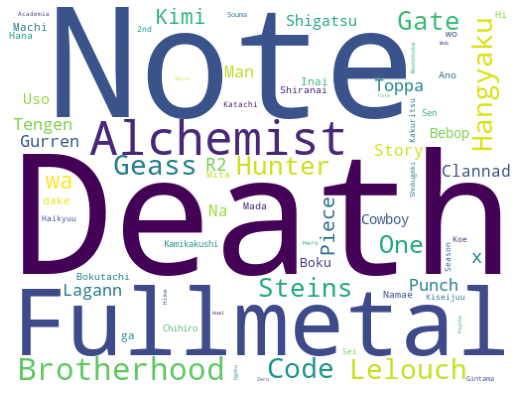

In [48]:
plt.subplots(figsize=(14,7))
wordcloud = WordCloud(    collocations=False,
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(list_popularity_and_rank_100))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [33]:
anime_genre = DF_AnimeList_Filtrado['genre']
genre_list = []

genre_splited = []

for i in anime_genre.index:
    for j in anime_genre[i].split(", "):
        genre_splited.append(j)
        if j not in genre_list:
            genre_list.append(j) 

print(genre_list)

['Comedy', 'Supernatural', 'Romance', 'Shounen', 'Parody', 'School', 'Magic', 'Shoujo', 'Drama', 'Fantasy', 'Kids', 'Action', 'Music', 'Slice of Life', 'Josei', 'Harem', 'Shounen Ai', 'Adventure', 'Super Power', 'Sci-Fi', 'Ecchi', 'Seinen', 'Martial Arts', 'Game', 'Sports', 'Demons', 'Historical', 'Horror', 'Mystery', 'Samurai', 'Hentai', 'Space', 'Mecha', 'Psychological', 'Police', 'Vampire', 'Military', 'Thriller', 'Yaoi', 'Cars', 'Shoujo Ai', 'Dementia', 'Yuri']


In [34]:
F = [0]*43
M =   [0]*43

DF_genre = pd.DataFrame({'genre': genre_list, 'Female': F, 'Male': M})
DF_genre.set_index('genre', inplace=True)

for i in DF_UserAnimeList_Filtrado_sub.index:
    for j in DF_UserAnimeList_Filtrado_sub.genre[i].split(", "):
        DF_genre[DF_UserAnimeList_Filtrado_sub.gender[i]][j] +=1 
        
DF_genre.head()

Female    Male
genre                       
Comedy        140161  353260
Supernatural   70759  161100
Romance        92177  206930
Shounen        63853  164159
Parody         10646   29374

In [35]:
Female = []
Male = []

for i in genre_list:
    Female.append(DF_genre.loc[i,'Female']/sum(DF_genre.loc[i,:]))
    Male.append(DF_genre.loc[i,'Male']/sum(DF_genre.loc[i,:])) 

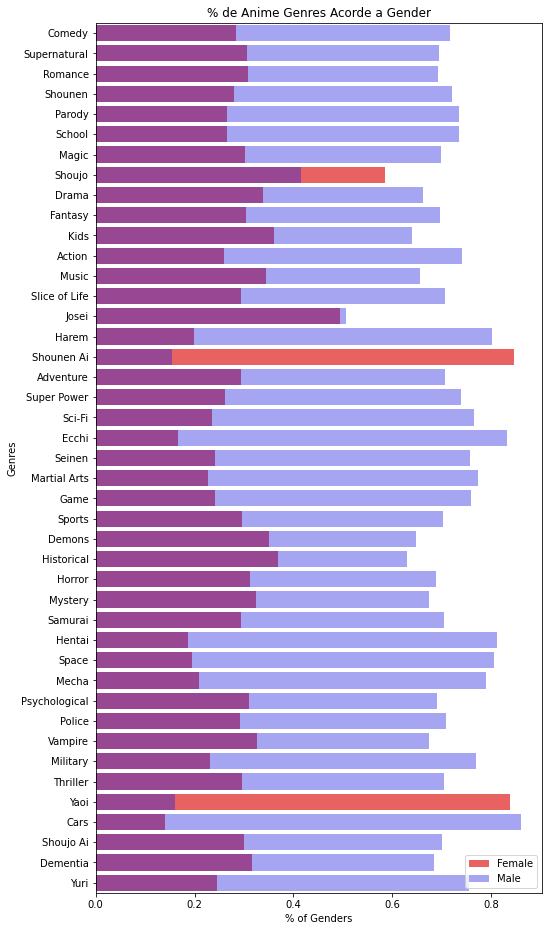

In [46]:
f,ax = plt.subplots(figsize=(8,16))
sns.barplot(x=Female, y=genre_list, label='Female', color='r', alpha = 0.7)
sns.barplot(x=Male, y=genre_list, label='Male', color='b', alpha = 0.4)

ax.set(xlabel='% of Genders', ylabel='Genres', title='% de Anime Genres Acorde a Gender')
ax.legend(loc='lower right',frameon= True)
plt.show()

## Analisis de Datos

In [50]:
report_DF_UserAnimeList_Filtrado_sub = pp.ProfileReport(DF_UserAnimeList_Filtrado_sub)
report_DF_UserAnimeList_Filtrado_sub.to_file("report.html")

report_DF_UserAnimeList_Filtrado_sub

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 58.70it/s]
